In [0]:
import random
import networkx as nx
import imageio
import matplotlib.pyplot as plt
import numpy as np
import warnings, matplotlib
warnings.filterwarnings("ignore")  # matplotlib warnings
from ipywidgets import interact, FloatSlider

# Ex. 3

SIR model on a network You are given a graph representing the contact
network. So an edge between the nodes v and w means that if v becomes
infected at some point, the disease has the potential to spread directly to
w. Each node may go through the Susceptible-Infectious-Removed cycle.
The progress of the epidemic is controlled by the contact network structure
and an additional quantity: the probability of contagion p (for the sake of
simplicity we assume that the length of the infection is exactly one time
step). You should simulate the dynamics synchronously as follows:

* Initialize all nodes as susceptible. 
* Select a single node at random to begin the infection.
* While there are any infected nodes do :
  * For each infected node u in the previous step:
      * For each susceptible neighbor v of u with probability p set it
to infected on the next step,
  * Set u to recovered on the next step.

In [0]:
class Simulate:
    def __init__(self, G, p):
        self._G = G
        self._p = p
        # Set start node
        start = random.choice(list(G.nodes()))
        # Initialize simulation
        self._S = []
        self._I = []
        self._R = []
        self._N = G.number_of_nodes()
        self._time = 0
        for node in list(G.nodes()):
            if node == start:
                self._I.append(node)
            else:
                self._S.append(node)
        
    def step(self):
        """Single step of simulation."""
        to_infect = set()
        for infected in self._I:
            for candidate in self._G[infected]:
                if candidate in self._S:
                    if random.random() < self._p:
                        to_infect.add(candidate)
        self._R += self._I
        self._I = list(to_infect)
        self._S = list(set(self._S) - to_infect)
        self._time += 1
    
    def fraction_infected(self, now=True):
        """Fraction of infected. Float."""
        if now:
            return len(self._I)/self._N
        else:
            return (len(self._I)+len(self._R))/self._N
    
    def has_infected(self):
        """Has infected nodes or not? Bool."""
        return len(self._I) > 0
        
    def simulation_steps(self):
        """Return number of simulation steps taken. Int."""
        return self._time
    
    def plot(self, pos, colors={'S': 'blue', 'I': 'orange', 'R': 'green'}, **options):
        """Plot graph using specified positions."""
        def set_color(v):
            if v in self._S:
                return colors['S']
            elif v in self._I:
                return colors['I']
            else:
                return colors['R']
        color = [set_color(v) for v in self._G.nodes()]
        nx.draw(self._G, pos=pos, node_color=color, **options)

# A

Simulate the model on: 
* a 2D lattice, 
* a random graph, 
* a Watts-Strogatz graph and 
* a Barabasi-Albert graph. 

Keep thenumber of nodes low, e.g. equal to 100 (performance issues).

In [0]:
lattice = nx.grid_2d_graph(10,10)
ba = nx.random_graphs.barabasi_albert_graph(100,5)
erd = nx.random_graphs.erdos_renyi_graph(100,0.2)
ws=nx.random_graphs.watts_strogatz_graph(100,5, 0.2)

In [4]:
s = Simulate(lattice, 0.3)
while s.has_infected():
    s.step()
print(s.simulation_steps())

2


In [5]:
s = Simulate(ba, 0.3)
while s.has_infected():
    s.step()
print(s.simulation_steps())

1


In [6]:
s = Simulate(erd, 0.3)
while s.has_infected():
    s.step()
print(s.simulation_steps())

6


In [7]:
s = Simulate(ws, 0.3)
while s.has_infected():
    s.step()
print(s.simulation_steps())

3


# B

Record the fraction of infected nodes in the network at each time
point for three different values of p. Because the SIR dynamics is
stochastic, you will want to simulate each infection multiple times
with the same starting node. Plot the average of this runs over time
for each value of p

In [0]:
def fraction_infected(G, p, N=300):
    simulations = [Simulate(G, p) for _ in range(N)]
    fractions = []
    while any([s.has_infected() for s in simulations]):
        the_sum = 0
        for s in simulations:
            the_sum += s.fraction_infected()
            s.step()
        fractions.append(the_sum/N)
    fractions.append(0)
    return fractions

In [9]:
@interact(p=FloatSlider(value=0.1, min=0, max=1, step=0.01))
def do_plot(p):
    F = fraction_infected(lattice, p)
    plt.plot(range(len(F)), F, 'o')
    plt.show()

interactive(children=(FloatSlider(value=0.1, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [10]:
@interact(p=FloatSlider(value=0.1, min=0, max=1, step=0.01))
def do_plot(p):
    F = fraction_infected(ba, p)
    plt.plot(range(len(F)), F, 'o')
    plt.show()

interactive(children=(FloatSlider(value=0.1, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [11]:
@interact(p=FloatSlider(value=0.1, min=0, max=1, step=0.01))
def do_plot(p):
    F = fraction_infected(erd, p)
    plt.plot(range(len(F)), F, 'o')
    plt.show()

interactive(children=(FloatSlider(value=0.1, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [12]:
@interact(p=FloatSlider(value=0.1, min=0, max=1, step=0.01))
def do_plot(p):
    F = fraction_infected(ws, p)
    plt.plot(range(len(F)), F, 'o')
    plt.show()

interactive(children=(FloatSlider(value=0.1, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

# C

Discuss how the infection curves compare to the behavior seen in the
ODE model

We can observe that nature of infected, recovered and susceptible people on graph and in standard ODE model are very similary. It's worth to notice that shape of this curves highly depends of network topology. For all models we observer trend that with higher  p  it's more likely to have epidemy. The case of random graph topology is very interesting because even for quite small  p=0.3  we observe epidemy. It may be connected to the fact that this topology has many connections and it's easier for desease to spread through whole network. On the other hand the most 'robust' for epidemy is grid lattice topology. It's also quite understandable because this network has not so many connections (max. 4 for one node) and it's harder to reach every single node. Moreover the one more interesting thing is time of the highest value of infected people and duration of whole process. We can observer that with higher  p  the times are shorter. The last interesting fact is that we can observe flatten the curve effect when we get lower  p  values, especially for for Watts-Strogatz model.

#D

Now select at least 20 different values of p. Simulate the SIR dynamics on the network starting with a random node. Measure the total
propotion of the network that becomes infected, the time to clear
infection and the time to the largest number of infected nodes. Be
sure to simulate the infection enough times (each run starting from
a different randomly chosen starting node) that you can reasonably
estimate the mean of each of these measures. For each measure plot
it as a function of p. Make one plot for each measure, including a
separate line (labeled appropriately) for each network.

In [0]:
def run_simulation(G, p, N=1000):
    def single_step():
        s = Simulate(G, p)
        worst = 0
        worst_step = None
        while s.has_infected():
            if s.fraction_infected() > worst:
                worst = s.fraction_infected()
                worst_step = s.simulation_steps()
            s.step()
        infection_ended = s.simulation_steps()
        been_infected = s.fraction_infected(now=False)
        return been_infected, infection_ended, worst_step
    results = [single_step() for _ in range(N)]
    [been, time, worst] = zip(*results)
    return sum(been)/N, sum(time)/N, sum(worst)/N

In [0]:
P = np.linspace(0, 1, 20)
[fraction_infected1, time1, worst1] = zip(*[run_simulation(lattice, p) for p in P])
[fraction_infected2, time2, worst2] = zip(*[run_simulation(ba, p) for p in P])
[fraction_infected3, time3, worst3] = zip(*[run_simulation(erd, p) for p in P])
[fraction_infected4, time4, worst4] = zip(*[run_simulation(ws, p) for p in P])

In [15]:
plt.plot(P, fraction_infected1,label='lattice')
plt.plot(P, fraction_infected2, label='Barabasi-Albert')
plt.plot(P, fraction_infected3, label='Erdos-Renyi')
plt.plot(P, fraction_infected4, label='Watts-Strogatz')
plt.legend(loc='best')
plt.xlabel('probability')
plt.ylabel('fraction infected')
plt.show()

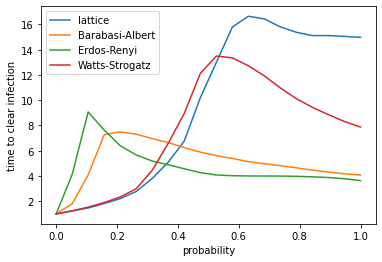

In [16]:
plt.plot(P, time1,label='lattice')
plt.plot(P, time2, label='Barabasi-Albert')
plt.plot(P, time3, label='Erdos-Renyi')
plt.plot(P, time4, label='Watts-Strogatz')
plt.legend(loc='best')
plt.xlabel('probability')
plt.ylabel('time to clear infection')
plt.show()

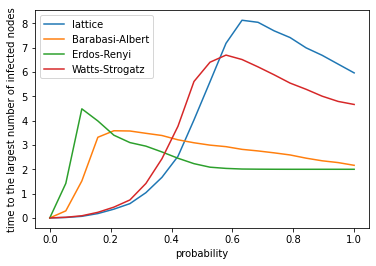

In [17]:
plt.plot(P, worst1,label='lattice')
plt.plot(P, worst2, label='Barabasi-Albert')
plt.plot(P, worst3, label='Erdos-Renyi')
plt.plot(P, worst4, label='Watts-Strogatz')
plt.legend(loc='best')
plt.xlabel('probability')
plt.ylabel('time to the largest number of infected nodes')
plt.show()

In [18]:
times1 = [a/b for a,b in zip(time1,worst1) if b]
times2 = [a/b for a,b in zip(time2,worst2) if b]
times3 = [a/b for a,b in zip(time3,worst3) if b]
times4 = [a/b for a,b in zip(time4,worst4) if b]
plt.loglog(P[1:], times1,label='lattice')
plt.loglog(P[1:], times2, label='Barabasi-Albert')
plt.loglog(P[1:], times3, label='Erdos-Renyi')
plt.loglog(P[1:], times4, label='Watts-Strogatz')
plt.legend(loc='best')
plt.xlabel('probability')
plt.ylabel('time to the largest number of infected nodes')
plt.show()

# E

What each of the above measures tells you about the different networks?

Total propotion of the network that becomes infected
This measure tell us in which combination of p and network topology is there possibility to infect the whole network. As we can see on the image the most probable is random graph which even on low probability  p  has high risk to infect all nodes in the network. It may be caused by the fact that random graphs are highly connected so the desease can rapidly spread. As we go further with less conected network topologies the higer probability of spreading desease must be reached to get whole network infected. I would also say that the shape of the curves can tell us a little bit. For example for random network the small increase in probability  p  generates higher value of statistic and by going to next topologies the shape is more convex and this means that these topologies are more robust to sensitive changes in parameter  p  (which for example in case of deseases may be good for us).

Time to clear infection
This measure tell us how fast the desease will end. My intuition for that it should have paraboloid shape becasue for small  p  there won't be epidemy so the desease will naturaly die fast and for high  p  there will be epidemy so everybody will be sick and this will also end the process. The maxium of this function should be somewhere in between.

Time to the largest number of infected nodes
This measure tell us when will be the peak of the desease. The shape and interpretation is very similary to 'Time to clear infection' because approximately the maxium of this function is in the halfway of the whole desease so the shape will remain the same and value should be half of previous value.

# F

For each network of size N = 30, visualize a single run of the infection
spreading in form of an animated gif or an avi file.


In [0]:
lattice = nx.grid_2d_graph(6,5)
ba = nx.random_graphs.barabasi_albert_graph(30,5)
erd = nx.random_graphs.erdos_renyi_graph(30,0.2)
ws=nx.random_graphs.watts_strogatz_graph(30,5, 0.2)

In [0]:
def animate(filename, G, p, pos=None, **keys):
    if pos is None:
        pos=nx.spring_layout(G)
    frames=[]
    s = Simulate(G, p)
    while s.has_infected():
        s.plot(pos)
        plt.savefig('temp.png')
        frames.append(imageio.imread('temp.png'))
        s.step()
    s.plot(pos)
    plt.savefig('temp.png')
    print("Simulation steps:", s.simulation_steps())
    frames.append(imageio.imread('temp.png'))
    imageio.mimwrite(filename, frames, fps=1, quality=10)

Simulation steps: 5


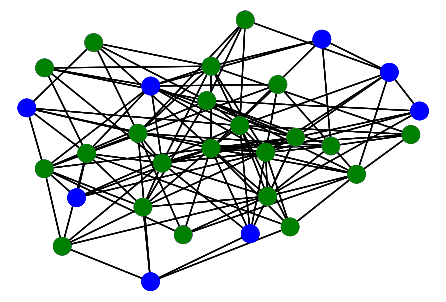

In [21]:
animate("ba.avi", ba,0.2)

Simulation steps: 11


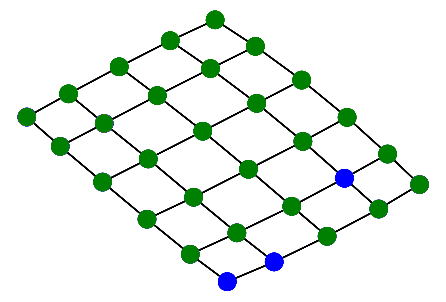

In [22]:
animate("lattice.avi", lattice,0.7)

Simulation steps: 4


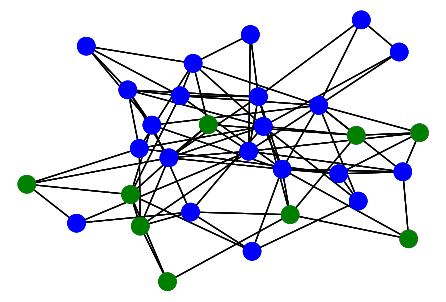

In [23]:
animate("erd.avi", erd,0.3)

Simulation steps: 12


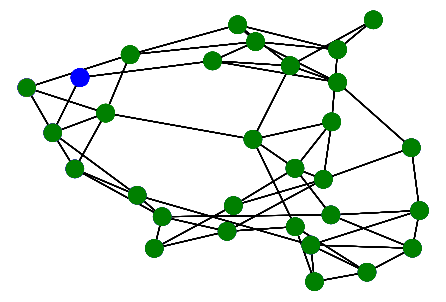

In [24]:
animate("ws.avi", ws,0.6)